<a href="https://colab.research.google.com/github/srinisosale/python-pgpaiml/blob/main/myFirstRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# to split the data into train and test
from sklearn.model_selection import train_test_split #sklearn package's randomized data spilliting function

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error


# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/boston.csv')

In [ ]:
# copying data to another variable to avoid any changes to original data
bostn=df.copy()

In [ ]:
# returns the first 5 rows
bostn.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,5.330,36.200


In [ ]:
bostn.shape

(506, 13)

In [ ]:
bostn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


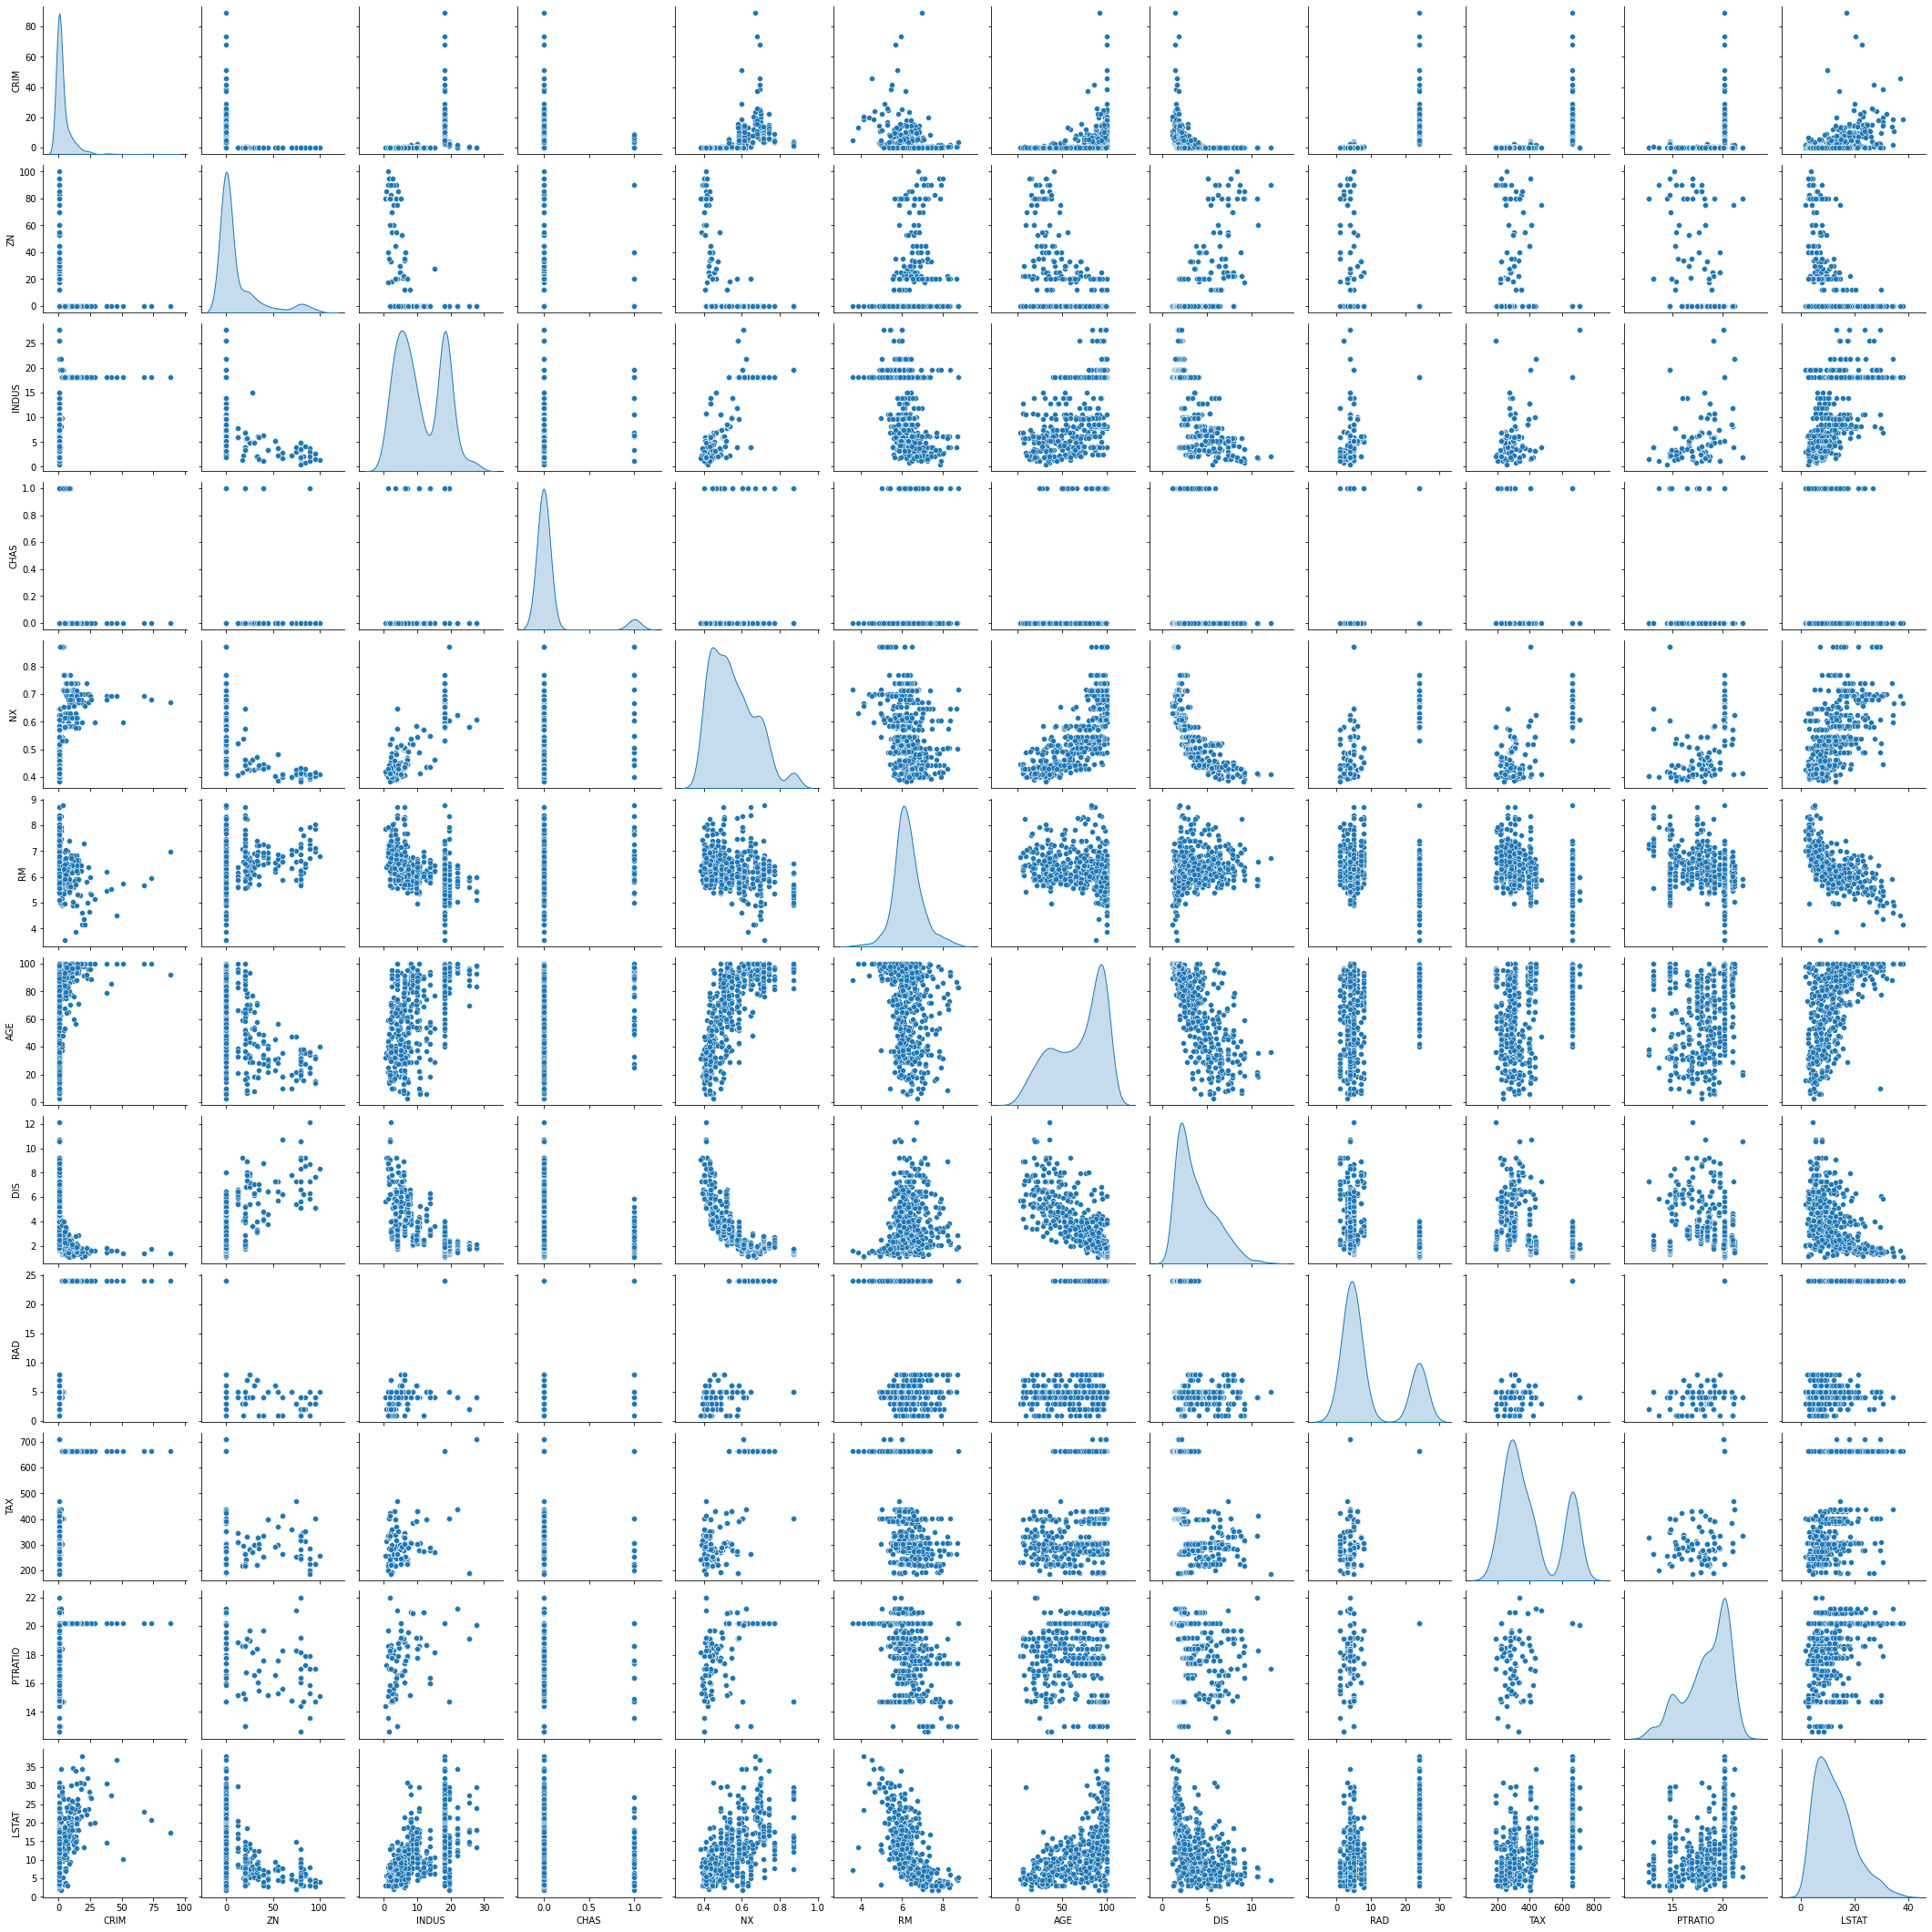

In [ ]:
bostn_attr = bostn.iloc[:,0:12]
sns.pairplot(bostn_attr, diag_kind='kde')#To plot density curve instead of histogram


In [ ]:
bostn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [ ]:
#Lets build linear model
#Independent variable
x=bostn.drop(['MEDV'], axis=1)
y=bostn[['MEDV']]

In [ ]:
#split training and testing into 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [ ]:
# intialize the model to be fit and fit the model on the train data
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

**Get the score on training set**

In [ ]:
# get the score (R-squared) on the training set

print(
    "The score (R-squared) on the training set is ",
    regression_model.score(x_train, y_train),
)

The score (R-squared) on the training set is  0.7073732058856179


Write your own function for the R-squared score

In [ ]:
def r_squared(model, x, y):
    y_mean = y.mean()
    SST = ((y - y_mean) ** 2).sum()
    SSE = ((y - model.predict(x)) ** 2).sum()
    r_square = 1 - SSE / SST
    return SSE, SST, r_square


SSE, SST, r_square = r_squared(regression_model, x_train, y_train)
print("SSE: ", SSE)
print("SST: ", SST)
print("R-squared: ", r_square)

SSE:  MEDV   8410.366
dtype: float64
SST:  MEDV   28740.928
dtype: float64
R-squared:  MEDV   0.707
dtype: float64


Get the score on test set

In [ ]:
# get the score (R-squared) on the test set

print(
    "The score (R-squared) on the test set is ", regression_model.score(x_test, y_test)
)

The score (R-squared) on the test set is  0.7721684899134136


Get the RMSE on train set

In [ ]:
print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, regression_model.predict(x_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  4.874227661429436


Get the RMSE on test set

In [ ]:
print(
    "The Root Mean Square Error (RMSE) of the model for the test set is ",
    np.sqrt(mean_squared_error(y_test, regression_model.predict(x_test))),
)

The Root Mean Square Error (RMSE) of the model for the test set is  4.569658652745824


Get the model coefficients

In [ ]:
# let's check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(regression_model.coef_, regression_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
CRIM,-0.114
ZN,0.061
INDUS,0.054
CHAS,2.518
NX,-22.249
RM,2.698
AGE,0.005
DIS,-1.534
RAD,0.299
TAX,-0.011


In [ ]:
# Let us write the equation of linear regression

Equation = "Price = " + str(regression_model.intercept_)
print(Equation, end=" ")

for i in range(len(x_train.columns)):
    if i != len(x_train.columns) - 1:
        print(
            "+ (",
            regression_model.coef_[i],
            ")*(",
            x_train.columns[i],
            ")",
            end="  ",
        )
    else:
        print("+ (", regression_model.coef_[i], ")*(", x_train.columns[i], ")")

Price = [49.88523466] + ( [-1.13844848e-01  6.11702680e-02  5.41034650e-02  2.51751196e+00
 -2.22485023e+01  2.69841282e+00  4.83604728e-03 -1.53429538e+00
  2.98833255e-01 -1.14135806e-02 -9.88914626e-01 -5.86132851e-01] )*( CRIM )  

IndexError: ignored

In [ ]:
for idx, col_name in enumerate(x_train.columns):
  print("The cooefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The cooefficient for CRIM is -0.11384484836914008
The cooefficient for ZN is 0.06117026804060645
The cooefficient for INDUS is 0.05410346495874601
The cooefficient for CHAS is 2.5175119591227144
The cooefficient for NX is -22.248502345084372
The cooefficient for RM is 2.6984128200099113
The cooefficient for AGE is 0.004836047284751951
The cooefficient for DIS is -1.5342953819992557
The cooefficient for RAD is 0.29883325485901313
The cooefficient for TAX is -0.011413580552025043
The cooefficient for PTRATIO is -0.9889146257039406
The cooefficient for LSTAT is -0.5861328508499133


In [ ]:
intercept=regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 49.88523466381736


The score(R^2) for in-sample and out-of sample

In [ ]:
regression_model.score(x_train,y_train)

0.7073732058856179